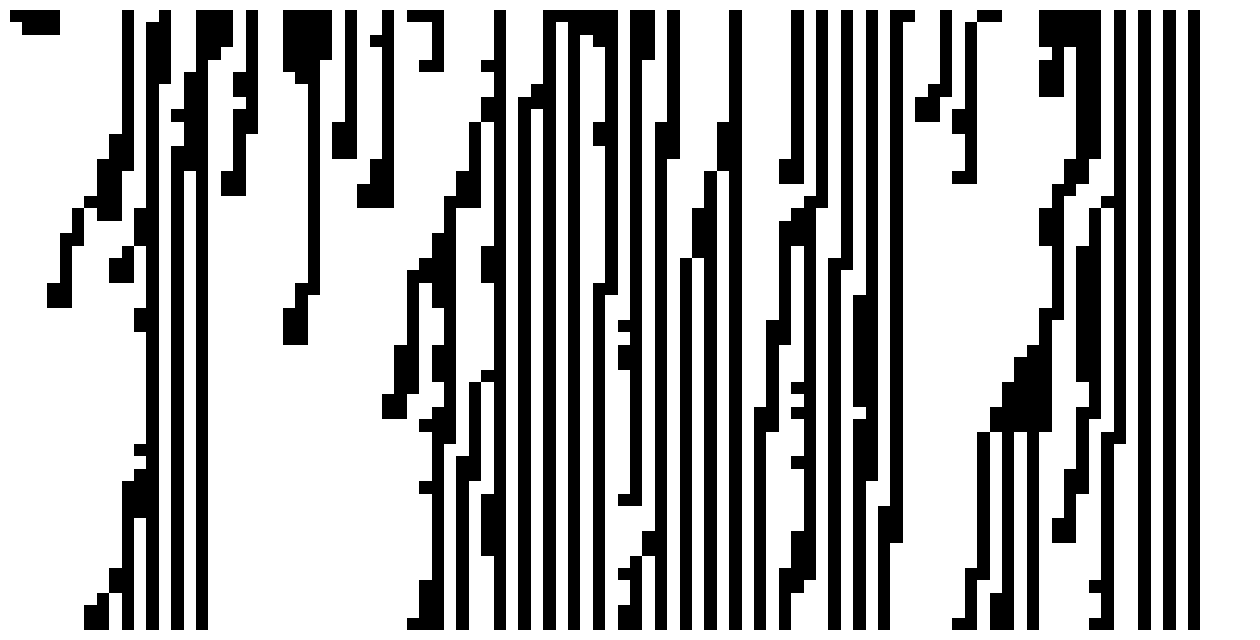

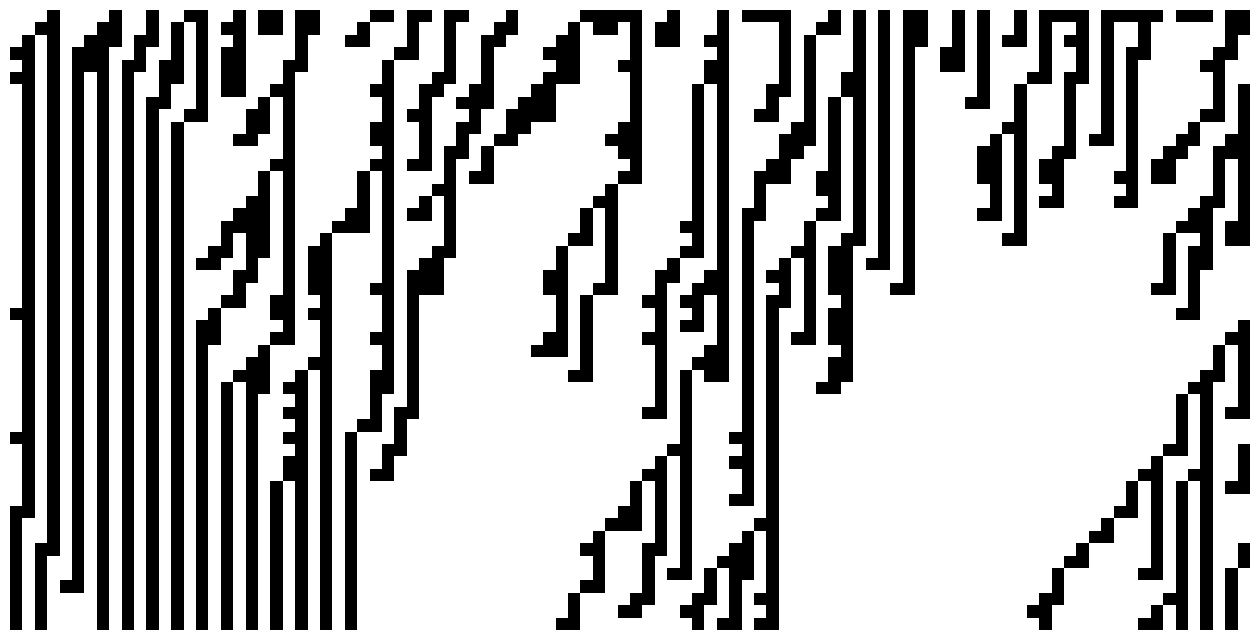

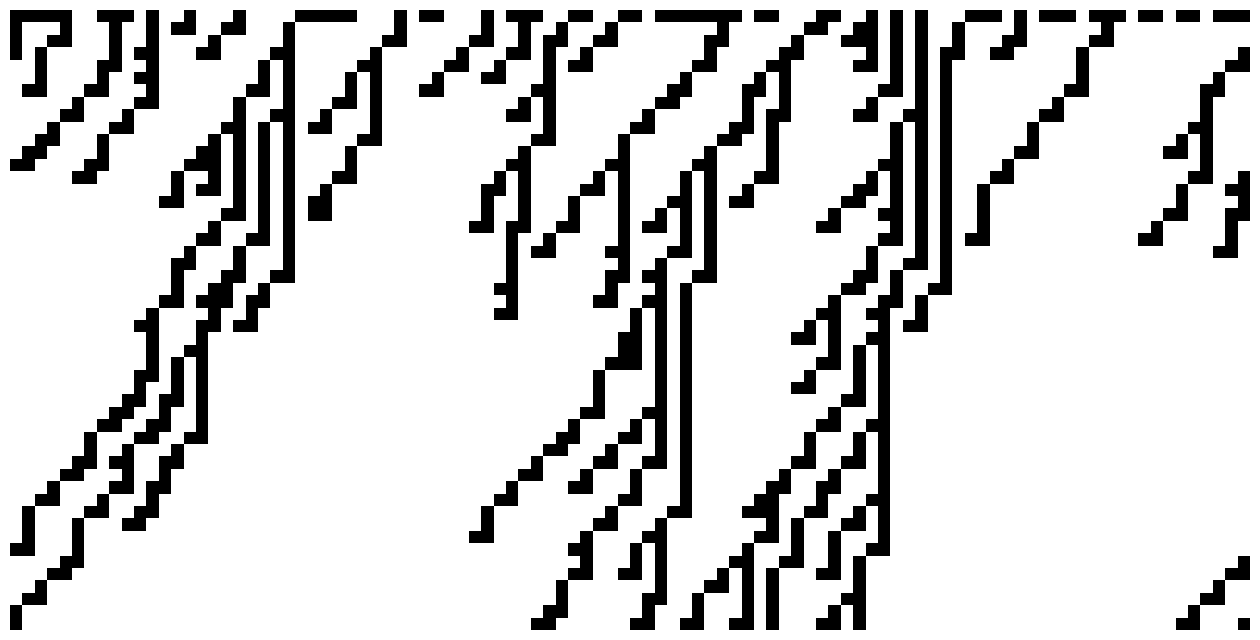

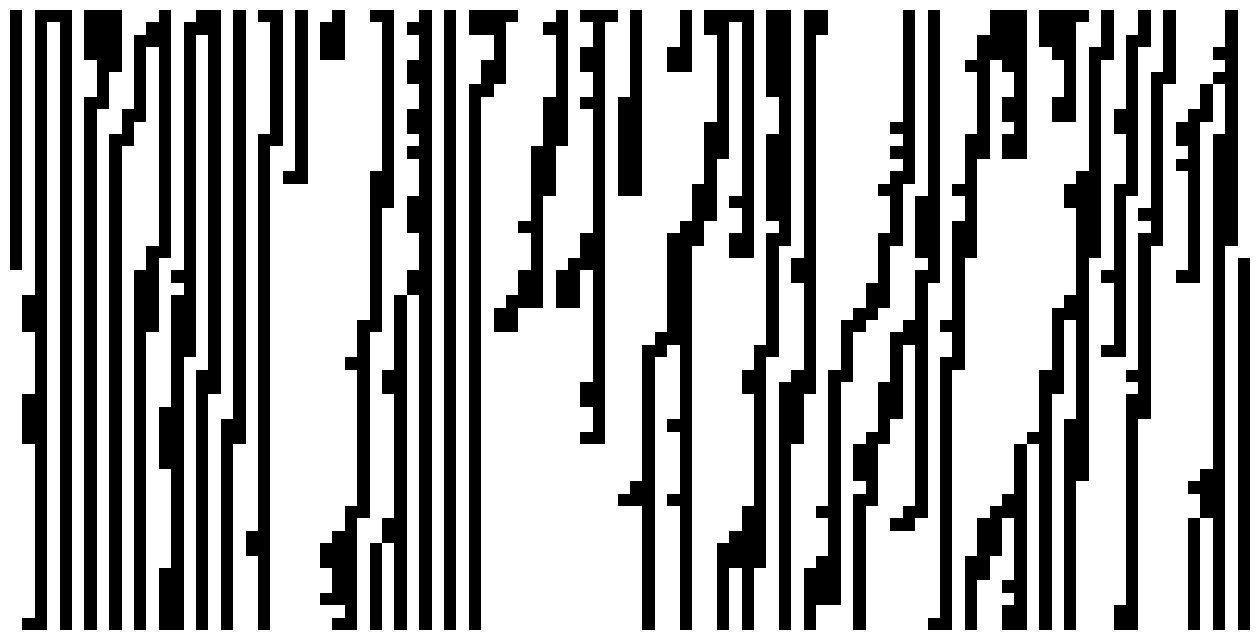

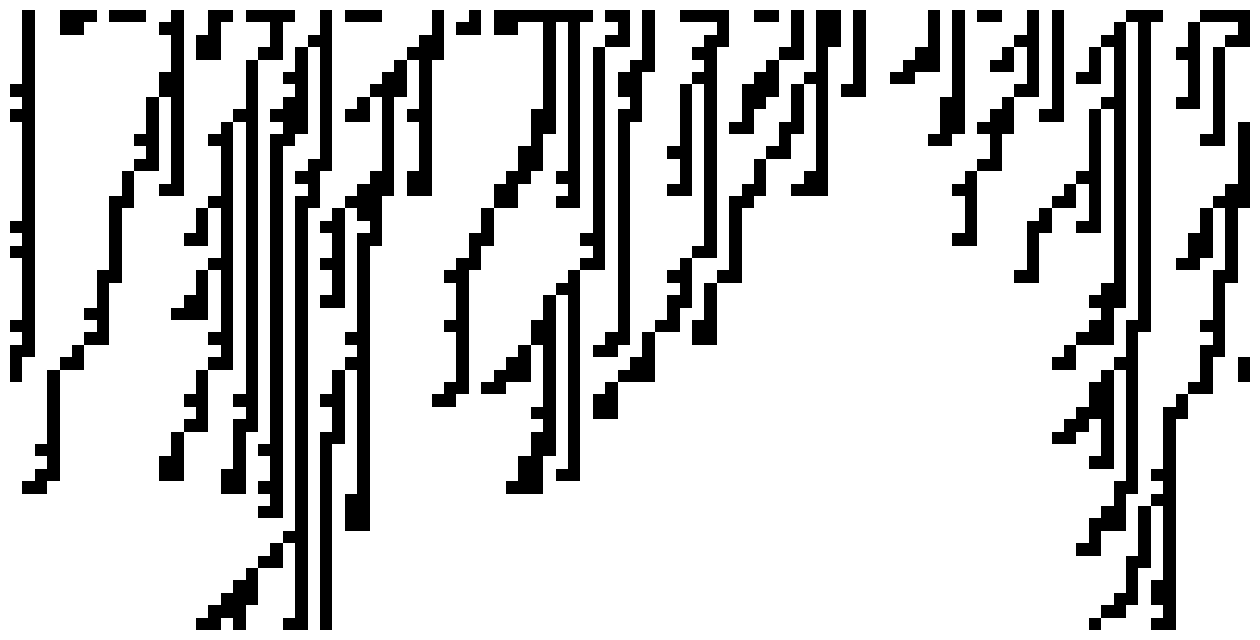

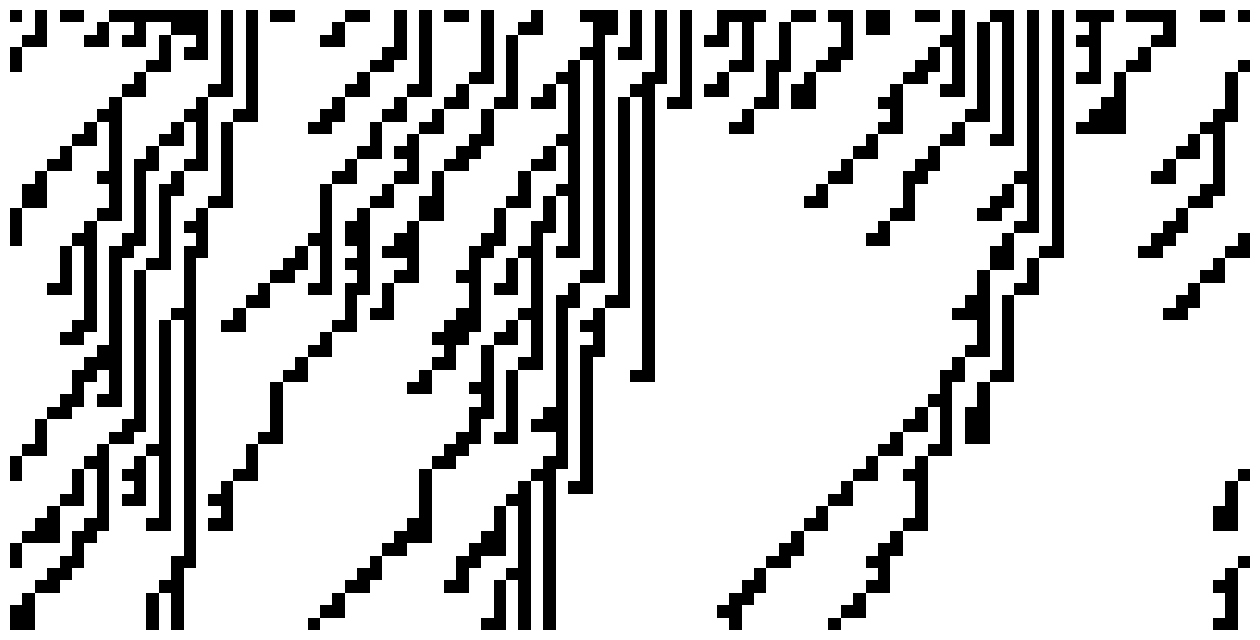

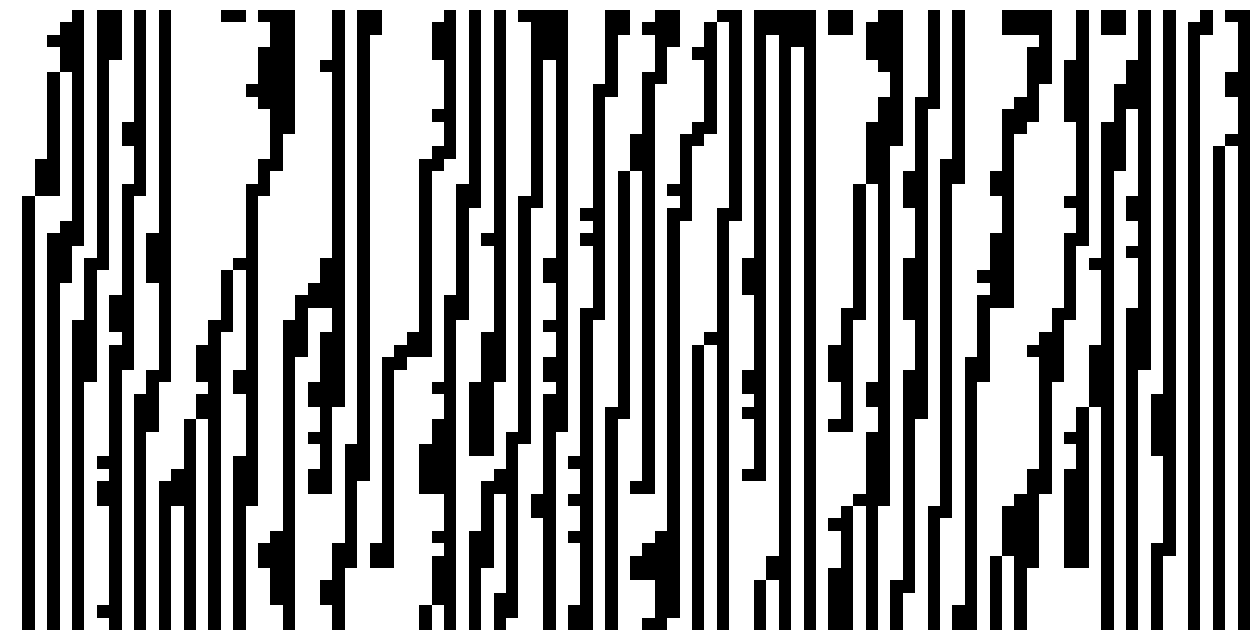

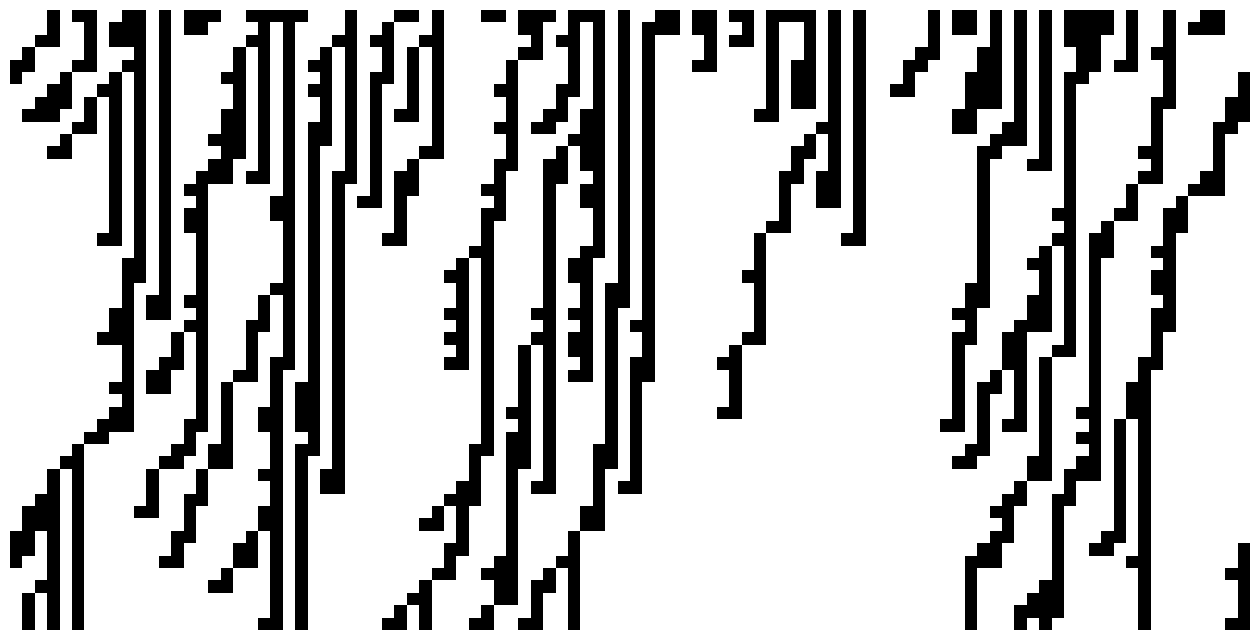

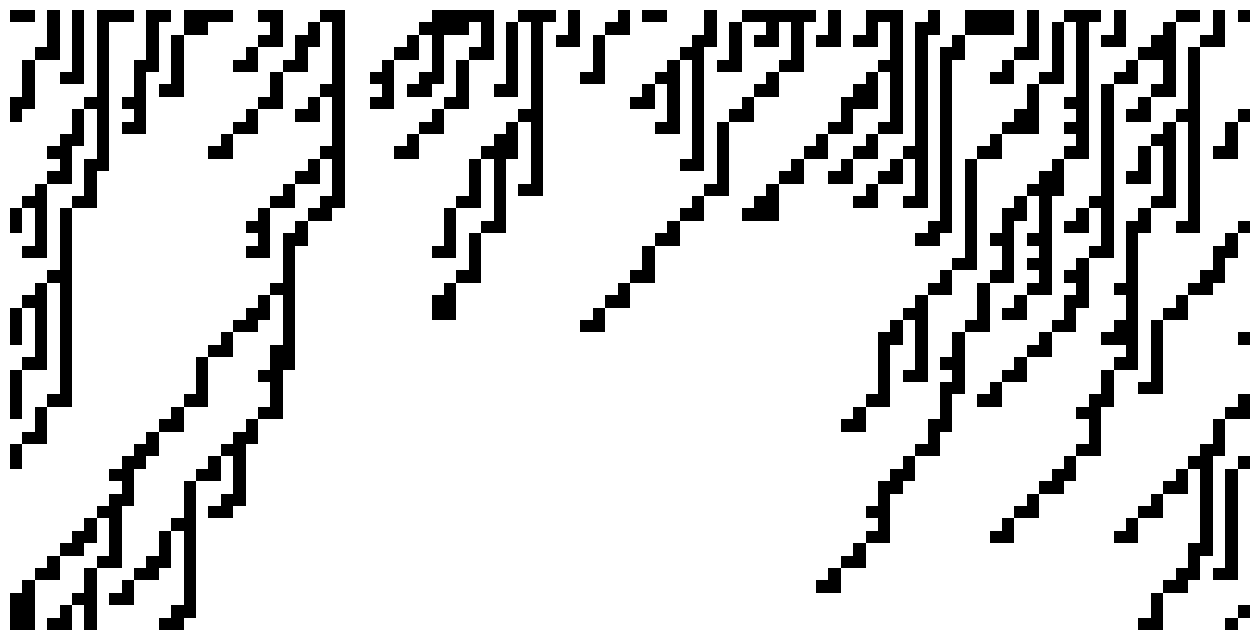

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

#Function to compute the evolution
#Here we use numba to speed up the code
@njit
def evolution(l, t, n, rule):
    #Create a array to save all the data
    data = np.zeros((t,n))

    #Initial conditions and rule
    initial = np.random.binomial(1, 0.5, n)
    if rule == 6: living = [[0,1,0], [0,0,1]] #rule 6
    elif rule == 50: living = [[1,0,1], [1,0,0], [0,0,1]] #rule 50
    else: living = [[1,1,1], [1,0,1], [1,0,0], [0,0,1]] #rule 178

    #Set configs to the initial array, this makes numba happy
    config = initial
    config_prev = initial

    #Loop over all timesteps
    for i in range(t):
        #Save configuration to the data array
        data[i] = config

        #If we are not in the first timestep, the previous config is the config of one timestep in the past
        if i > 0: config_prev = config

        #Copy previous configuration to current configuration    
        config = np.copy(config_prev)

        #Loop over all cells
        for j in range(n):
            #Make list of neightbours
            check = [config_prev[(j-1)%n], config_prev[j], config_prev[(j+1)%n]]

            #Generate number between 0 and 1 with probability l
            #If equal to one we apply f2
            if np.random.binomial(1, l, 1) == 1:
                #If the local rule says that it lives, it lives 
                if check in living:
                    config[j] = 1
                #Else it dies
                else: config[j] = 0
            #Else we do not change
    
    #Return density
    return data

#Define amount of cells and timesteps
t = 500 #Timestes
n = 1000 #Number of cells

alp = 0.25

#Import packages
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

#Function to compute the evolution
#Here we use numba to speed up the code
@njit
def evolution(l, t, n, rule):
    #Create a array to save all the data
    data = np.zeros((t,n))

    #Initial conditions and rule
    initial = np.random.binomial(1, 0.5, n)
    if rule == 6: living = [[0,1,0], [0,0,1]] #rule 6
    elif rule == 50: living = [[1,0,1], [1,0,0], [0,0,1]] #rule 50
    else: living = [[1,1,1], [1,0,1], [1,0,0], [0,0,1]] #rule 178

    #Set configs to the initial array, this makes numba happy
    config = initial
    config_prev = initial

    #Loop over all timesteps
    for i in range(t):
        #Save configuration to the data array
        data[i] = config

        #If we are not in the first timestep, the previous config is the config of one timestep in the past
        if i > 0: config_prev = config

        #Copy previous configuration to current configuration    
        config = np.copy(config_prev)

        #Loop over all cells
        for j in range(n):
            #Make list of neightbours
            check = [config_prev[(j-1)%n], config_prev[j], config_prev[(j+1)%n]]

            #Generate number between 0 and 1 with probability l
            #If equal to one we apply f2
            if np.random.binomial(1, l, 1) == 1:
                #If the local rule says that it lives, it lives 
                if check in living:
                    config[j] = 1
                #Else it dies
                else: config[j] = 0
            #Else we do not change
    
    #Return density
    return data

#Define amount of cells and timesteps
t = 50 #Timestes
n = 100 #Number of cells


for r in [6, 50, 178]:
    for alp in [0.25, 0.5, 0.75]:
        data = evolution(alp, t, n, 6)
        plt.rcParams['image.cmap'] = 'binary'
        
        fig, ax = plt.subplots(figsize=(16, 9))
        ax.matshow(data)
        ax.axis(False)
        
        fig.savefig('plots/rule'+str(r)+'alp'+str(alp)+'.pdf', bbox_inches='tight')






In [ ]:
#Function to compute the evolution
#Here we use numba to speed up the code
@njit
def evolution(l, t, n, rule):
    #Initial conditions and rule
    initial = np.random.binomial(1, 0.5, n)
    if rule == 6: living = [[0,1,0], [0,0,1]] #rule 6
    elif rule == 50: living = [[1,0,1], [1,0,0], [0,0,1]] #rule 50

    #Set configs to the initial array, this makes numba happy
    config = initial
    config_prev = initial

    #Loop over all timesteps
    for i in range(t):
        #If we are not in the first timestep, the previous config is the config of one timestep in the past
        if i > 0: config_prev = config

        #Copy previous configuration to current configuration    
        config = np.copy(config_prev)

        #Loop over all cells
        for j in range(n):
            #Make list of neightbours
            check = [config_prev[(j-1)%n], config_prev[j], config_prev[(j+1)%n]]

            #Generate number between 0 and 1 with probability l
            #If equal to one we apply f2
            if np.random.binomial(1, l, 1) == 1:
                #If the local rule says that it lives, it lives 
                if check in living:
                    config[j] = 1
                #Else it dies
                else: config[j] = 0
            #Else do nothing
    
    #Return density
    return np.sum(config)/n

#Function that generates data, inputs are rule number and suspected critical point.
def data_gen(t, n, rule, cp, points_before_cp, points_after_cp):
    #Create list to save data
    density_list = []

    #Create array of parameters we want to loop over
    lambdas1 = np.linspace(0, cp, points_before_cp, endpoint=False)
    lambdas2 = np.linspace(cp, 1, points_after_cp)
    lambdas = np.concatenate((lambdas1, lambdas2))

    #For each lambda compute the evolution
    for l in lambdas:
        d = evolution(l, t, n, rule)
        density_list.append(d)
        print(l) #For checking progress
    
    #Save the data
    data = np.column_stack([lambdas, density_list])
    np.savetxt(str(rule)+'.txt', data)

#Function for plotting the data
def plotter(rule):
    #Load in the data
    data = np.loadtxt(str(rule)+'.txt')

    #Plot the data
    plt.scatter(data[:,0], data[:,1], marker='o')
    plt.grid()
    plt.xlabel("lambda")
    plt.ylabel("density")
    plt.title("Density vs lambda plot for rule "+str(rule))
    plt.savefig(str(rule)+'.pdf')
    plt.show()
    plt.clf()

#Define amount of cells and timesteps
t = 50 #Timesteps
n = 100 #Number of cells

data_gen(t, n, 6, 0.55, 10, 20)
data_gen(t, n, 146, 0.7, 10, 100)
plotter(146)
plotter(58)
